Данный проект является одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении\ уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на\ ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

переменные, которые содержит датасет:\
1 school — аббревиатура школы, в которой учится ученик\
2 sex — пол ученика ('F' - женский, 'M' - мужской\
3 age — возраст ученика (от 15 до 22)\
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)\
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)\
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не\ работает, 'other' - другое)\
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home'- не работает,\
'other' - другое)\
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная\ программа, 'other' - другое)\
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)\
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)\
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)\
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)\
16 schoolsup — дополнительная образовательная поддержка (yes или no\
17 famsup — семейная образовательная поддержка (yes или no)\
18 paid — дополнительные платные занятия по математике (yes или no)\
19 activities — дополнительные внеучебные занятия (yes или no)\
20 nursery — посещал детский сад (yes или no)\
21 higher — хочет получить высшее образование (yes или no)\
22 internet — наличие интернета дома (yes или no)\
23 romantic — в романтических отношениях (yes или no)\
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)\
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)\
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)\
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)\
28 absences — количество пропущенных занятий\
29 score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.xls')

In [2]:
# Предварительный анализ
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
print(df.shape) # мы увидим информацию о размерности нашего датафрейма 

(395, 30)


Наш датасет состоит из 395 строк, 30 столбцов
При предварительном осмотре наших данных сразу видим наличие пропусков, и данные достаточно не чистые 
Из 30 признаков - 13 числового типа, и 17 нечислового. И 3 числовых признака-это возвраст/age; пропуски занятий/absences
и наша независимая переменная-баллы по матетематике/score. 
Все остальные 27 признаков - категориальные и бинарные, к последнему отнесем временно столбец studytime_granular, о котором нет информации 


### Первичный анализ данных в столбцах. Часть I

In [4]:
# Посмотрим название столбцов нашего датасета
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
# Для удобства переименуем столбцы
# df.columns = [x.split()[0].lower() for x in df.columns]
df.columns = [x.lower() for x in df.columns]
#df.rename(str.lower, axis='columns')
df.rename({'studytime, granular':'studytime_granular'},axis='columns', inplace=True)
#df['studytime, granular'].set_axis(['studytime_granular'], axis = 1, inplace = True)
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
df.describe(include='all') # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,395,395,395.000000,378,368,350,392.000000,371.000000,376,359,378,364,367.000000,388.000000,373.000000,386,356,355,381,379,388.000000,375,361,364,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,295,261,314,NaN,NaN,133,197,137,250,NaN,NaN,NaN,335,219,200,195,300,NaN,356,305,240,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.750000,2.614555,NaN,NaN,NaN,NaN,1.438692,2.038660,0.337802,NaN,NaN,NaN,NaN,NaN,-6.115979,NaN,NaN,NaN,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.098127,2.228732,NaN,NaN,NaN,NaN,0.694181,0.842078,0.743135,NaN,NaN,NaN,NaN,NaN,2.526235,NaN,NaN,NaN,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000


In [7]:
df.nunique() # количество уникальных значений для каждого столбца 

school                 2
sex                    2
age                    8
address                2
famsize                2
pstatus                2
medu                   5
fedu                   6
mjob                   5
fjob                   5
reason                 4
guardian               3
traveltime             4
studytime              4
failures               4
schoolsup              2
famsup                 2
paid                   2
activities             2
nursery                2
studytime_granular     4
higher                 2
internet               2
romantic               2
famrel                 6
freetime               5
goout                  5
health                 5
absences              36
score                 18
dtype: int64

По анализу уникальных значений, сразу можно посмотреть на наличие выбросов в категорийных переменных, потому из данных очевидно сколько должно быть уникальных значений.
В итоге будем проверять столбцы, в которых уникалальных значений больше, чем должно быть, и это говорит о выбросах в них:\
fedu           6 должно быть 5\
famrel         6 должно быть 5\
Выбросы в числовых данных будем рассмаривать в отдельности. \
Так же отдельно будем смотреть studytime_granular как категориальный или нет, 4 уникальных значений 


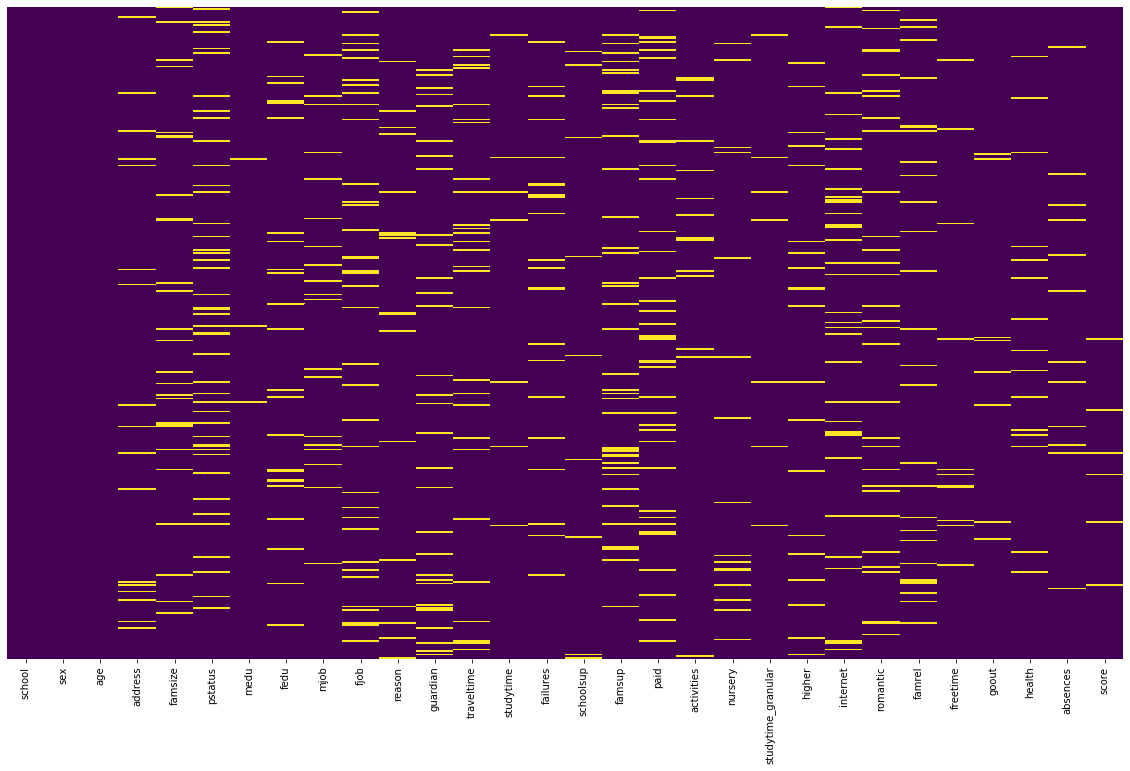

In [8]:
# Визуально оценим количество пропусков и их распределение:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Визуальное убеждаемся в наличии большего распределения пропусков и их наличия в наших переменных, но их не на столько много, чтобы удалять какие-либо столбцы

In [9]:
# Посмотрим на количественный показатель пропусков в данных
df.isnull().sum().sort_values()

school                 0
sex                    0
age                    0
medu                   3
score                  6
studytime_granular     7
studytime              7
goout                  8
schoolsup              9
freetime              11
absences              12
activities            14
health                15
nursery               16
address               17
reason                17
mjob                  19
higher                20
failures              22
fedu                  24
famrel                27
famsize               27
traveltime            28
guardian              31
romantic              31
internet              34
fjob                  36
famsup                39
paid                  40
pstatus               45
dtype: int64

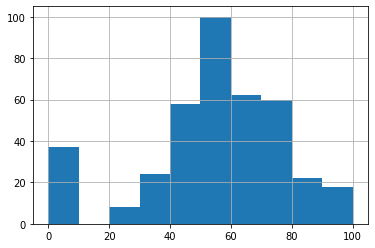

In [10]:
# Рассмотрим распределение нашей независимой переменной
df.score.hist()

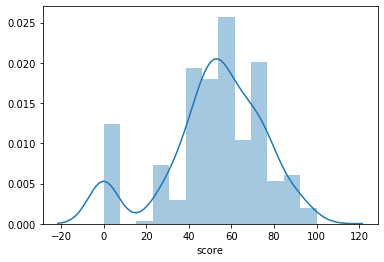

In [11]:
sns.distplot(df.score)

По анализу столбца score видим что выбросов нет, есть нулевые значения, которые в реальности имееют место быть, и есть пропуски, которые будем учитывать, как отдельный признак

### Первичный анализ данных в столбцах. Часть II - Числовые переменные

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

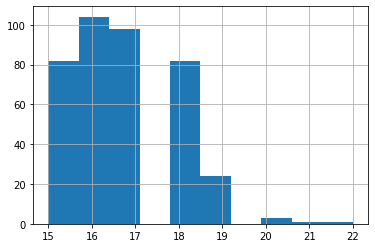

In [12]:
# age/возраст - посмотрим распределение признака:
df.age.hist()
df.age.describe()

In [13]:
# По возрасту видим средний возраст 17 лет, min 15, max 22, и выбросов не наблюдается

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

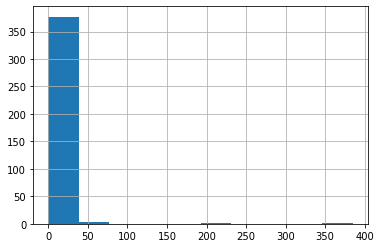

In [14]:
# absences/пропуски занятий - посмотрим распределение признака:
df.absences.hist()
df.absences.describe()

In [15]:
# В absences есть выбросы, и max=385, что достаточно очень отличается от нормального распределения

In [16]:
# Вместо замены пропусков средним значением,
# по методу  линейн.регрессии научим модель прогнозировать переменную absences, и заполним пропуски в этой переменной

from sklearn.model_selection import train_test_split# инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split


df_2 = df.loc[df.absences<100] # ограним датасет от больших выбросов, чтобы точнее научить модель
train_df = df_2.loc[:, ['age','absences']].dropna()
#test_df = df[pd.isna(df.absences)== True]['age']#.values #.reshape((-1, 1))

Y= train_df['absences'].values#.reshape((-1, 1))
X = train_df['age'].values.reshape((-1, 1))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

y_pred = myModel.predict(X_test)
#y_pred

In [17]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))

MAE: 5.209367795053205


In [18]:
test_df = df[pd.isna(df.absences)== True]['age'].values.reshape((-1, 1))
y2=myModel.predict(test_df)
c = pd.Series(y2).round()
df.absences = df.absences.fillna(value=c) # заменили пропуски на предсказанное значение

count    383.000000
mean       1.396794
std        1.100860
min        0.000000
25%        0.000000
50%        1.609438
75%        2.197225
max        5.955837
Name: absences, dtype: float64

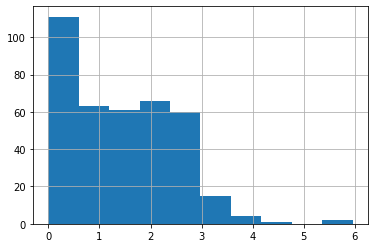

In [19]:
# Поскольку в нашей перемееной есть большой перепад значений, поэтому попробуем логарифмировать переменную
df.absences = df.absences.apply(lambda w: np.log(w + 1))
df.absences.hist()
df.absences.describe()

count    381.000000
mean       1.374409
std        1.059072
min        0.000000
25%        0.000000
50%        1.609000
75%        2.197000
max        4.331000
Name: absences, dtype: float64

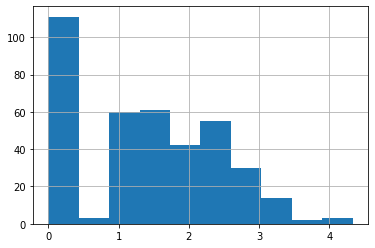

In [20]:
# Значение более згладились, исключим выбросы и скратим длинный "хвост" значений. примерно до 5
df = df.loc[df.absences<5]
df.absences = df.absences.round(3)
df.absences.hist()
df.absences.describe()

Оставим прогнозные значения, в любом случае, можно вернуться и заменить их на 0 или среднее значение.

In [21]:
df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,1.946,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,1.609,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,2.398,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,1.099,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,1.609,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.000,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,1.386,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,1.386,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.000,50.0


### Первичный анализ данных в столбцах. Часть II - Категориальные переменные

Из предварительного анализа столбцы fedu и failures имеют уникалальных значений больше, чем должно быть, поэтому посмотрим на них в отдельности

In [22]:
print(df.fedu.value_counts())
print(df.famrel.value_counts())

2.0     103
3.0      92
4.0      83
1.0      76
0.0       2
40.0      1
Name: fedu, dtype: int64
 4.0    174
 5.0     97
 3.0     60
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64


In [23]:
# Очевидно эти лишние уникальные знаяения ошибочны, логично заменим их на 4 и 1
df.fedu.loc[(df.fedu == 40)] = 4
df.famrel.loc[(df.famrel == -1)] = 1
# Проверим
print(df.fedu.value_counts())
print(df.failures.value_counts())

2.0    103
3.0     92
4.0     84
1.0     76
0.0      2
Name: fedu, dtype: int64
0.0    283
1.0     48
2.0     14
3.0     14
Name: failures, dtype: int64


C:\Users\MartinHome\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Так же из предварительного анализа подметили столбец studytime_granular\
Проверим его

-6.0     187
-3.0     100
-9.0      62
-12.0     27
Name: studytime_granular, dtype: int64

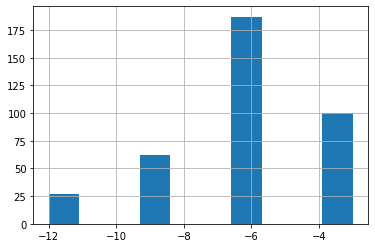

In [24]:
df.studytime_granular.hist()
df.studytime_granular.describe()
df.studytime_granular.value_counts()

По гистограмме и значениям понимаем, что это категорийный признак с минусовыми значениями\
Ниже для наглядности посмотрим на столбец с похожим названием studytime

2.0    187
1.0    100
3.0     62
4.0     27
Name: studytime, dtype: int64

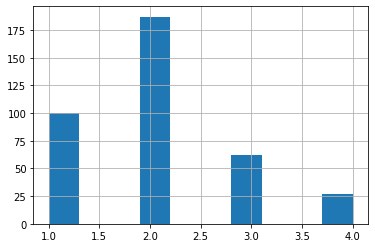

In [25]:
df.studytime.hist()
df.studytime.describe()
df.studytime.value_counts()

В итоге видим что между значениями столбцов прямая  линейная обратная зависимость с коэффециентом -3, 
и корреляционный анализ это нам должен показать высокую скоррелированность признаков

 По скольку катег.признаков много, и все нужно проверить и произвести очистку данных, то для этого лучше сделать одну функцию,
 

In [26]:
def stack (nor):
    for i in nor:
        #if nor[i].dtype == 'object':
        if nor[i].nunique()>2: 
            nor[i] = nor[i].apply(lambda x: None if pd.isnull(x) else None if x == 'nan'else x) # для Dummy-переменной
        else:
            a = (nor[i].describe())[2]
            nor[i] = nor[i].apply(lambda x: a if pd.isnull(x) else a if x == 'nan'else x) # заменяем пропуски тор-значением
            
    return nor
    

In [27]:
stack(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,1.946,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,1.609,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,2.398,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,1.099,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,1.609,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,yes,no,1.0,1.0,1.0,5.0,0.000,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,1.386,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,1.386,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.000,50.0


In [28]:
df.isna().sum() # проверим на замену пропусков

school                 0
sex                    0
age                    0
address                0
famsize                0
pstatus                0
medu                   3
fedu                  24
mjob                  18
fjob                  35
reason                17
guardian              30
traveltime            28
studytime              5
failures              22
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime_granular     5
higher                 0
internet               0
romantic               0
famrel                27
freetime              11
goout                  8
health                15
absences               0
score                  5
dtype: int64

### Корреляционный анализ

In [29]:
df2 = df.loc[:, ['age', 'absences', 'score']]
df2.corr(method='pearson')

,age,absences,score
age,1.000000,0.138099,-0.149349
absences,0.138099,1.000000,0.162553
score,-0.149349,0.162553,1.000000


По анализу числовые переменные мало скоррелированы с нашей независимой переменной, у нас всего 2 числовых переменных, корреляция между которыми тоже низкая.

In [30]:
# Но поскольку у нас есть категорийные переменные в числового типа, то можем посмотреть и на их корреляию   
df2 = df.select_dtypes(exclude ='object')
df2.corr(method='pearson')

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.162516,-0.162922,0.086465,-0.002322,0.198041,0.002322,0.058081,0.020152,0.113966,-0.073547,0.138099,-0.149349
medu,-0.162516,1.000000,0.630981,-0.188118,0.066289,-0.236856,-0.066289,-0.025913,0.012492,0.057847,-0.055867,0.095830,0.206289
fedu,-0.162922,0.630981,1.000000,-0.145161,-0.003513,-0.268503,0.003513,-0.031184,-0.029217,0.037715,0.021999,0.012356,0.114440
traveltime,0.086465,-0.188118,-0.145161,1.000000,-0.106861,0.080884,0.106861,-0.029956,-0.015613,0.037620,-0.008070,-0.016600,-0.074311
studytime,-0.002322,0.066289,-0.003513,-0.106861,1.000000,-0.169635,-1.000000,0.032844,-0.125228,-0.047024,-0.083844,-0.048218,0.108754
failures,0.198041,-0.236856,-0.268503,0.080884,-0.169635,1.000000,0.169635,0.001310,0.098952,0.095803,0.071229,0.053242,-0.325769
studytime_granular,0.002322,-0.066289,0.003513,0.106861,-1.000000,0.169635,1.000000,-0.032844,0.125228,0.047024,0.083844,0.048218,-0.108754
famrel,0.058081,-0.025913,-0.031184,-0.029956,0.032844,0.001310,-0.032844,1.000000,0.172625,0.081973,0.085546,-0.096747,0.059850
freetime,0.020152,0.012492,-0.029217,-0.015613,-0.125228,0.098952,0.125228,0.172625,1.000000,0.301532,0.047356,-0.012127,0.014591
goout,0.113966,0.057847,0.037715,0.037620,-0.047024,0.095803,0.047024,0.081973,0.301532,1.000000,-0.011575,0.121214,-0.133316


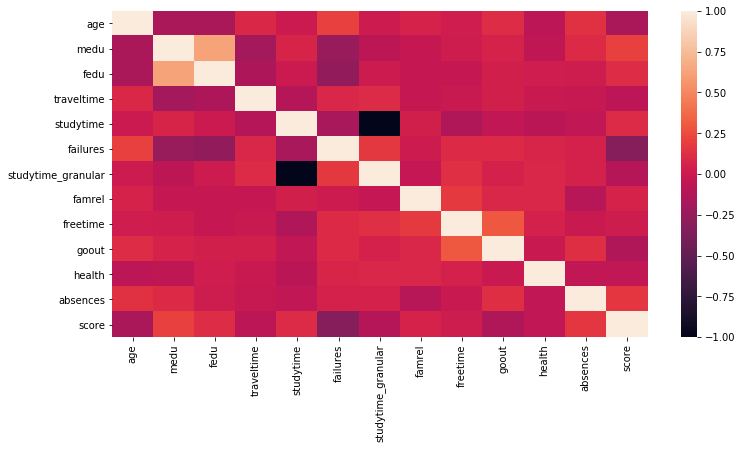

In [31]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(12,6)) # размер графика
#sns.heatmap(data=df2, annot=True)
sns.heatmap(df2.corr())

В итоге присутствует большая корреляция между fedu & medu, fedu & failures, medu & failures, а также как видим очевидную зависимость между studytime & studytime_granular.
Поскольку это это категорийные признаки, то итоги подведем после их анализа.

### Анализ номинативных переменных

Визуально посмотрим на плотность распределения переменных

In [32]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
        data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:5])],
        ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

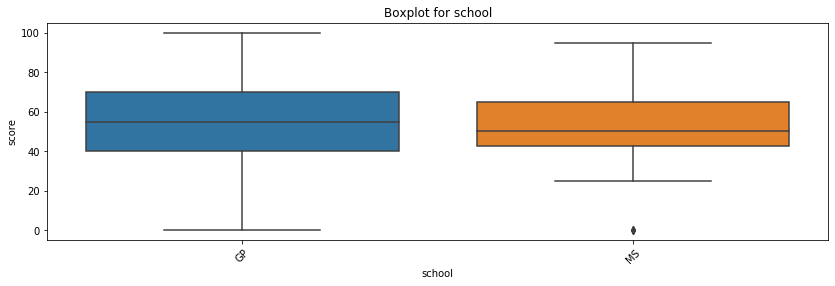

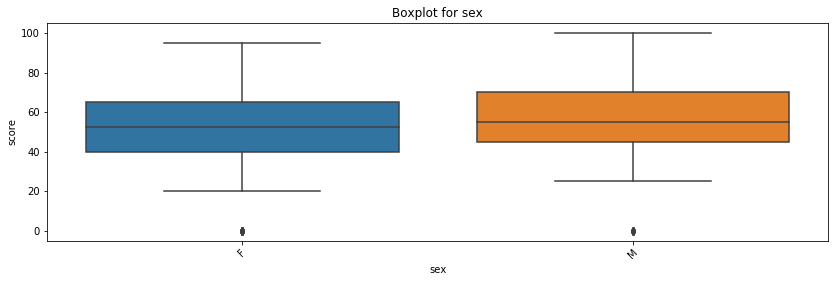

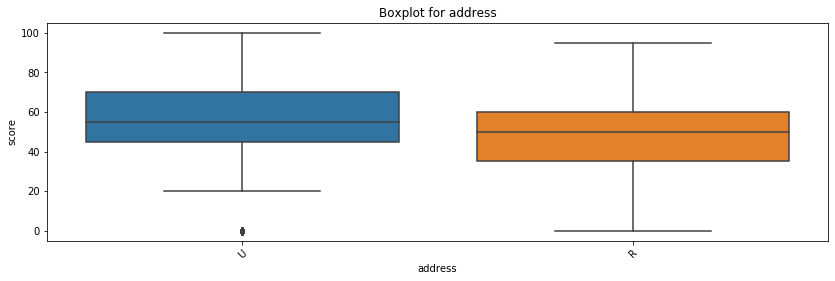

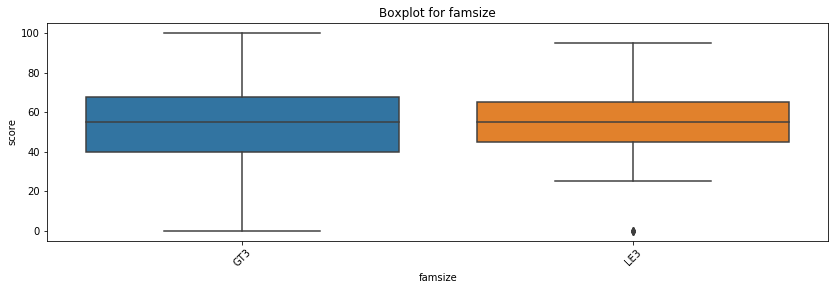

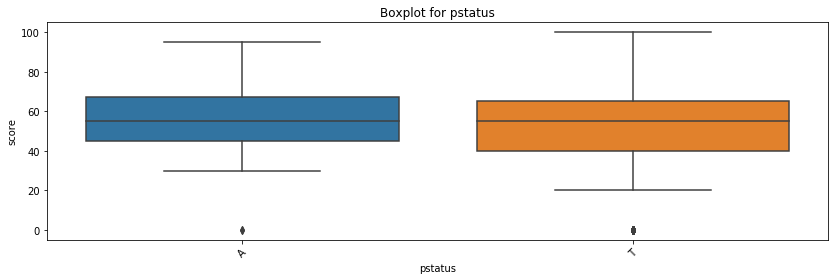

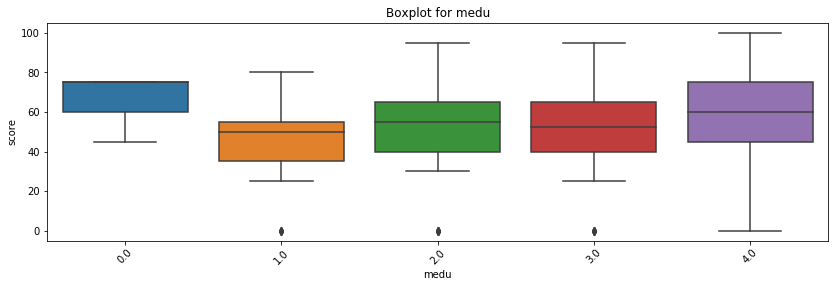

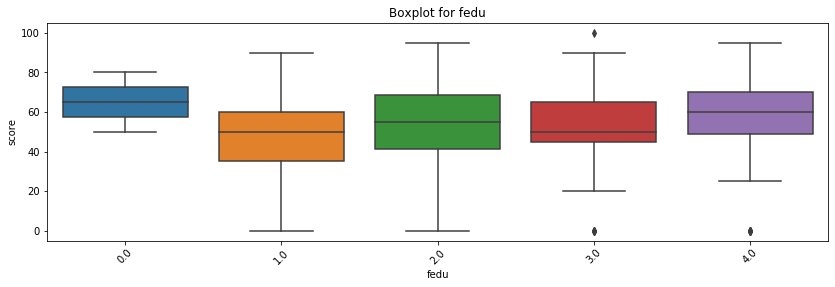

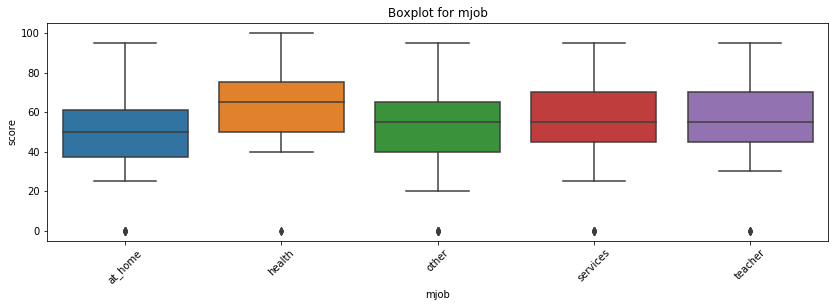

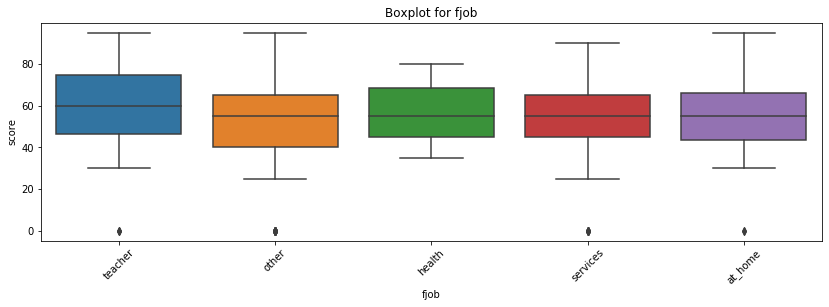

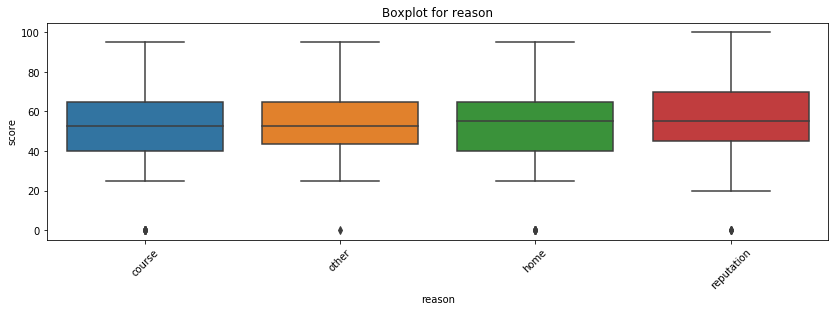

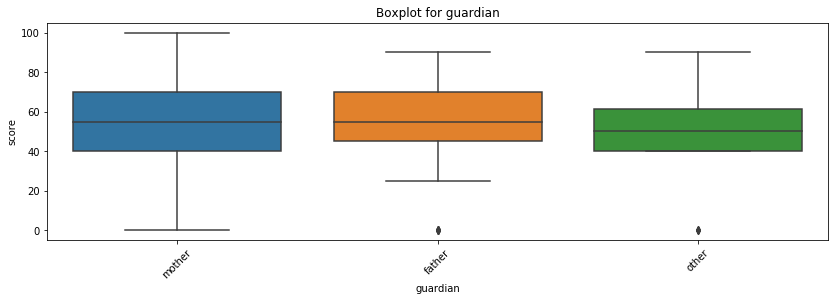

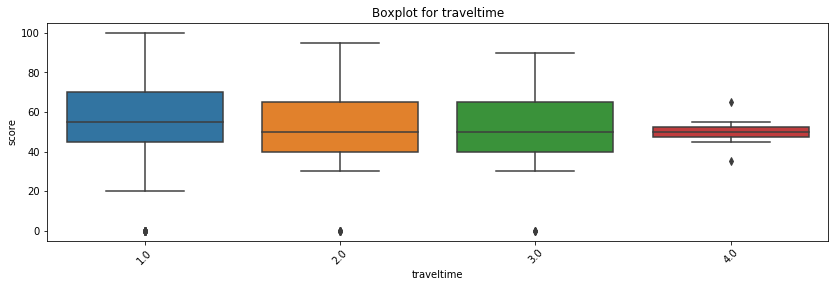

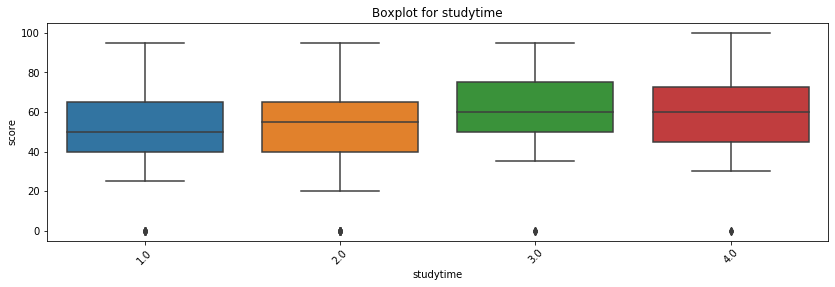

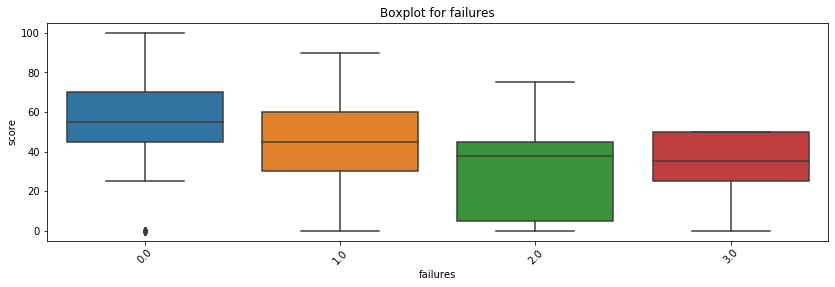

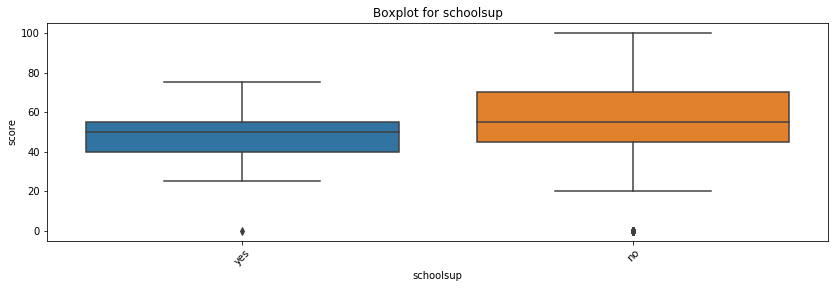

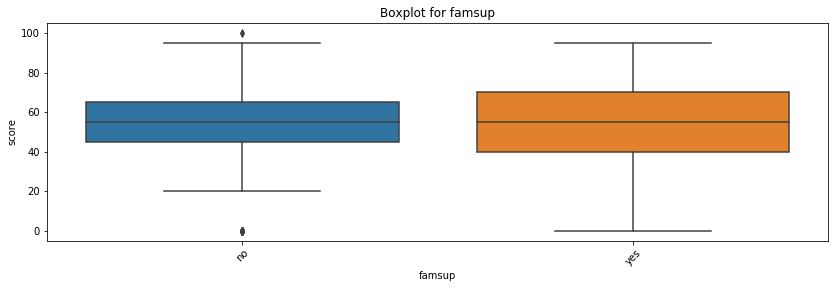

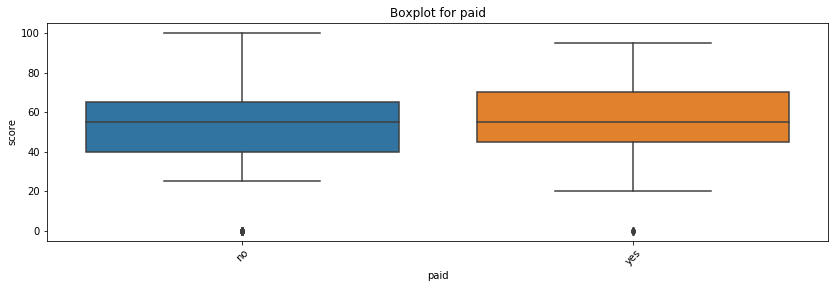

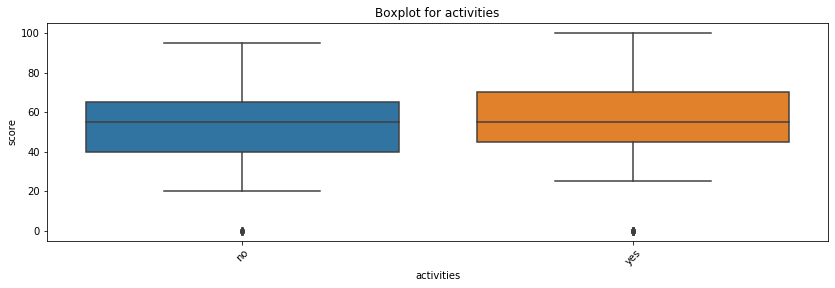

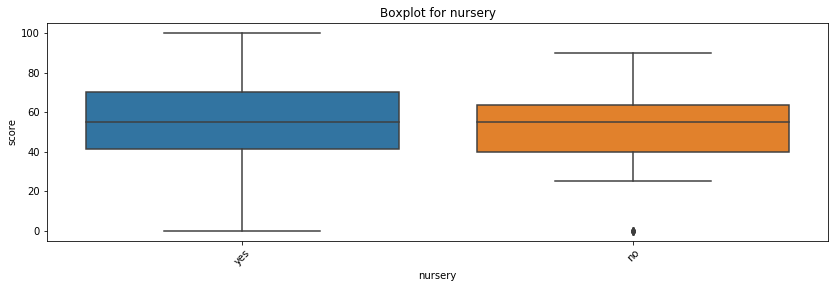

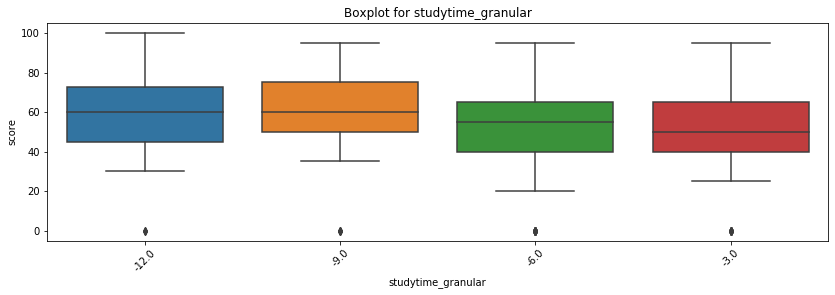

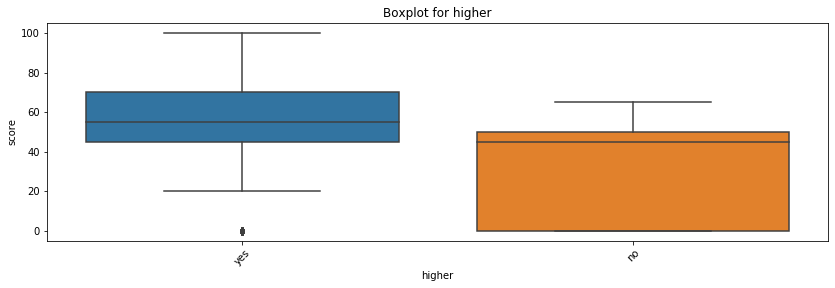

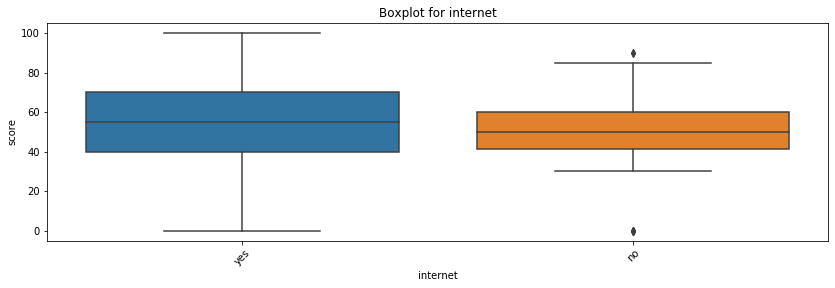

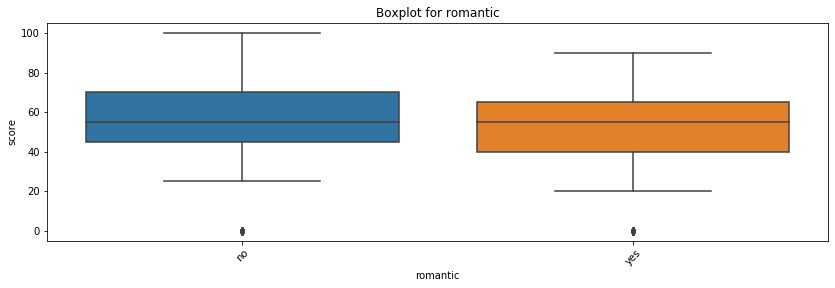

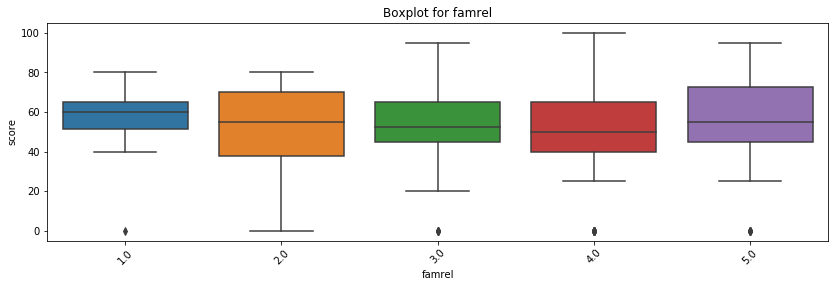

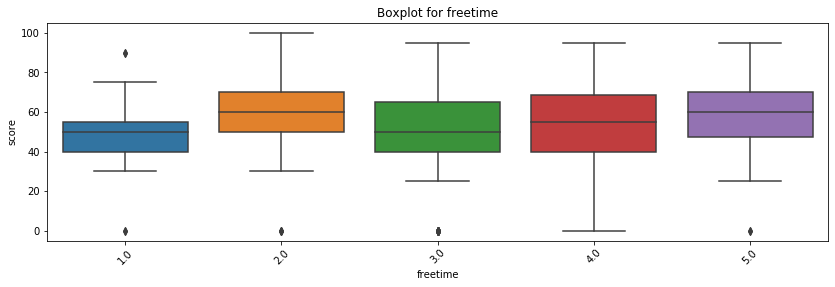

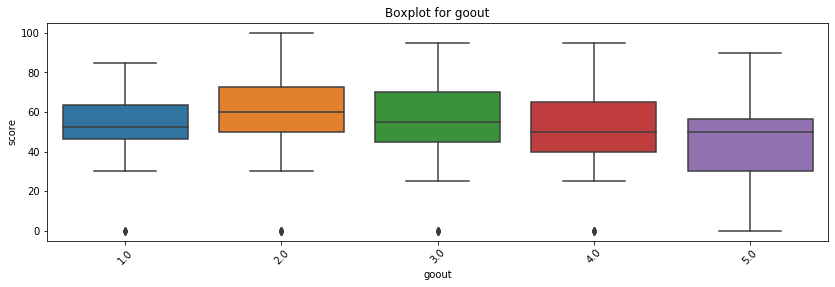

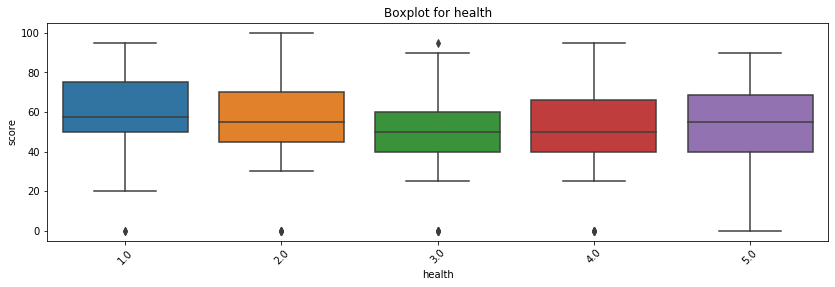

In [33]:
df_a = df.drop(['score', 'age', 'absences'], axis=1)
for col in df_a:
    get_boxplot(col)

Визуально замечаем, что не многие признаки (health, higher, freetime, failures, studytime, mjob,goout, medu) влияют на оценку

In [34]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
# Проверим нулевую гипотезу о том, что распределения оценоки score по различным параметрам неразличимы:

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [35]:
df_a = df.drop(['score', 'age', 'absences'], axis=1)
for col in df_a:
    get_stat_dif(col)

C:\Users\MartinHome\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\MartinHome\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\MartinHome\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются только параметр mjob и goout. Но мы для обучения модели оставим и те, которые выделили на грфике box-plot, таким образом вместе с числовыми признаками составим датасет для модели

In [36]:
df_model = df.loc[:, ['health', 'higher', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu', 'age', 'absences']]
df_model.head()

,health,higher,freetime,failures,studytime,goout,mjob,medu,age,absences
0,3.0,yes,3.0,0.0,2.0,4.0,at_home,4.0,18,1.946
1,3.0,yes,3.0,0.0,2.0,3.0,at_home,1.0,17,1.609
2,3.0,yes,3.0,3.0,2.0,2.0,at_home,1.0,15,2.398
3,5.0,yes,2.0,0.0,3.0,2.0,health,4.0,15,1.099
4,5.0,yes,3.0,0.0,2.0,2.0,other,3.0,16,1.609


Выводы по результатам EDA для анализа влияния параметров на оценку госэкзамена по математике, такие:
1. Данных много, но имеются пропуски - и больше всего в столбце pstatus (более 10%) - столбец содержит информацию совместного проживания родителей, поэтому можно сказать, что этот столбец, как и многие другие из всего датасета содержат информацию личного и семейного характера, которую при опросе намеренно не указывали.
2. В данных не много выбросов, что говорит о достаточно чистых данных.
3. Числовых данных мало - обратная корреляция оценки с возрастом, может говорить, что чем старше ученик чем будет хуже оценка, возможно из за того,что со временем знания забываются, снижается способность учиться, или старшие ученики заняты работой. И положительная корреляция оценки с пропусками занятий по математике логична, чем больше ученик пропустил занятий, тем хуже оценка.
4. Т- тест отсеял все признаки, кроме признака mjob и goout, но для модели оставили больше признаков.
5. Для модели оставили следующие столбцы - health, higher, freetime, failures, studytime, goout, mjob, medu, age, absences

### Окончательная подготовка признаков для модели

На данном этапе проделаем следующие шаги:
1. Сгруппируем/объединим ответы в некоторых категорийных столбцах по средним значениям
2. Заменим категориальные признаки на Gammy-кодирование, с учетом пропусков, которые будут учитывать, как отдельный признак

In [39]:
df_m = df.loc[:, ['health', 'higher', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu', 'age', 'absences', 'score']]
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   health     366 non-null    float64
 1   higher     381 non-null    object 
 2   freetime   370 non-null    float64
 3   failures   359 non-null    float64
 4   studytime  376 non-null    float64
 5   goout      373 non-null    float64
 6   mjob       363 non-null    object 
 7   medu       378 non-null    float64
 8   age        381 non-null    int64  
 9   absences   381 non-null    float64
 10  score      376 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 35.7+ KB


In [40]:
def fyr (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 1:
            return col
        elif col== 5:
            return 3
        else:
            return 2
    #return col

In [41]:
df_m['health_new'] = df_m['health'].apply(lambda x: fyr(x))

In [43]:
def fyr2 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 1 or col==3:
            return 1
        else:
            return 2

In [44]:
df_m['freetime_new'] = df_m['freetime'].apply(lambda x: fyr2(x))

In [45]:
def fyr3 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 1 or col==2:
            return 1
        elif col== 3:
            return 2
        else:
            return 0

In [46]:
df_m['failures_new'] = df_m['failures'].apply(lambda x: fyr3(x))

In [47]:
def fyr4 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col ==4:
            return 3
        else:
            return col

In [48]:
df_m['studytime_new'] = df_m['studytime'].apply(lambda x: fyr4(x))

In [49]:
def fyr5 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 0 or col==1:
            return 0
        else:
            return 1

In [50]:
df_m['medu_new'] = df_m['medu'].apply(lambda x: fyr5(x))

In [51]:
def fyr6 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 'teacher':
            return 1
        else:
            return 0

In [52]:
df_m['mjob_new'] = df_m['mjob'].apply(lambda x: fyr6(x))

In [53]:
def fyr7 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        return 1

In [54]:
df_m['score_new'] = df_m['score'].apply(lambda x: fyr7(x))

In [55]:
def fyr8 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 2 or col==3:
            return col
        else:
            return 1

In [56]:
df_m['goout_new'] = df_m['goout'].apply(lambda x: fyr8(x))

In [57]:
for i in ['health_new', 'higher', 'freetime_new', 'failures_new', 'studytime_new', 'goout_new', 'mjob_new', 'medu_new', 'score_new']:
    df_m = pd.get_dummies(df_m, columns=[i], dummy_na=True)

In [58]:
df_m['score'] = df_m['score'].fillna(0)
df_MOD = df_m.drop(['health', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu'], axis='columns')

In [59]:
df_MOD.head()

,age,absences,score,health_new_1.0,health_new_2.0,health_new_3.0,health_new_nan,higher_no,higher_yes,higher_nan,freetime_new_1.0,freetime_new_2.0,freetime_new_nan,failures_new_0.0,failures_new_1.0,failures_new_2.0,failures_new_nan,studytime_new_1.0,studytime_new_2.0,studytime_new_3.0,studytime_new_nan,goout_new_1.0,goout_new_2.0,goout_new_3.0,goout_new_nan,mjob_new_0.0,mjob_new_1.0,mjob_new_nan,medu_new_0.0,medu_new_1.0,medu_new_nan,score_new_1.0,score_new_nan
0,18,1.946,30.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,17,1.609,30.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
2,15,2.398,50.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,15,1.099,75.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,16,1.609,50.0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [60]:
df_MOD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                381 non-null    int64  
 1   absences           381 non-null    float64
 2   score              381 non-null    float64
 3   health_new_1.0     381 non-null    uint8  
 4   health_new_2.0     381 non-null    uint8  
 5   health_new_3.0     381 non-null    uint8  
 6   health_new_nan     381 non-null    uint8  
 7   higher_no          381 non-null    uint8  
 8   higher_yes         381 non-null    uint8  
 9   higher_nan         381 non-null    uint8  
 10  freetime_new_1.0   381 non-null    uint8  
 11  freetime_new_2.0   381 non-null    uint8  
 12  freetime_new_nan   381 non-null    uint8  
 13  failures_new_0.0   381 non-null    uint8  
 14  failures_new_1.0   381 non-null    uint8  
 15  failures_new_2.0   381 non-null    uint8  
 16  failures_new_nan   381 non